In [18]:
import matplotlib.pyplot as plt
import my_lib as my
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

#Misure Eliminate da Data_2
9993,1.94,5
30068,1.98,0.5
99838,2.00,0.04

(99838, 2.0, 0.04)

In [19]:
#Parte 1-2

C = 22*n
R = 2675
Tau = R*C
f0 = 1/(2*pi*Tau) 

V01 = 2.04
V02 = 2.04
V03 = 2.04

err = 0.001
sd_y  = np.asarray([err,err,err,err,err,err,err,err,err,err,err,err,err,err])
sd_y2 = np.asarray([err,err,err,err,err,err,err,err,err,err,err])
sd_y3 = np.asarray([err,err,err,err,err,err,err,err,err,err])
f0

2704.417044892019

In [20]:
# Parte 3
L = 10*m
Rl = 38.9
Rb = 456
Taul = L/(Rl+Rb)
f0_2 = 1/(2*pi*Taul)
f0_2

7876.5781336179

In [21]:
D1 = pd.read_csv('Data_1.csv').T.to_numpy()
D2 = pd.read_csv('Data_2.csv').T.to_numpy()
D3 = pd.read_csv('Data_3.csv').T.to_numpy()

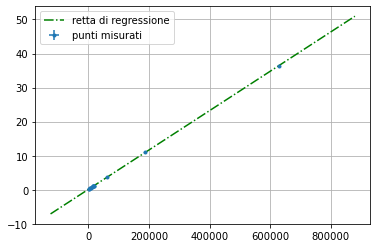

In [22]:
omega1 = D1[0]
V1 = D1[1]
Y1 = np.sqrt( np.power( V01/V1, 2) -1)
Fit1 = my.my_lin_fit( omega1*2*pi, Y1, sd_y, verbose=False,plot=True,err=False)

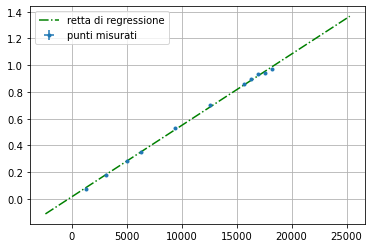

In [23]:
omega2 = D2[0]
V2 = D2[1]
Y2 = 1/np.sqrt( np.power( V02/V2, 2) -1)
Fit2 = my.my_lin_fit( omega2*2*pi, Y2, sd_y2, verbose=False,plot=True,err=False)

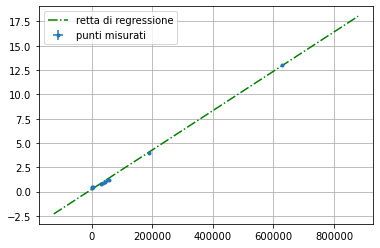

In [24]:
omega3 = D3[0]
V3 = D3[1]
Y3 = np.sqrt( np.power( (V03/V3)*(Rb/(Rb+Rl)), 2) -1)
Fit3 = my.my_lin_fit( omega3*2*pi, Y3, sd_y3, verbose=False,plot=True,err=False)

In [25]:
#Fit =[ m, sigma_m, c, sigma_c, cov]
taglio1 = np.sqrt( 2*(V01/V1[0])**2 - 1 )/Fit1[0]/(2*pi)
taglio2 = np.sqrt( 2*(V02/2.00)**2 - 1 )/Fit2[0]/(2*pi) #2.00 = V[13] eliminato
taglio3 = np.sqrt( 2*((V03/V3[0])*(Rb/(Rb+Rl)))**2 - 1 )/Fit3[0]/(2*pi)
print("t1 =",taglio1)
print("t2 =",taglio2)
print("t3 =",taglio3)

t1 = 2861.285296331426
t2 = 3099.2817736554966
t3 = 9071.79675655817


0.6078431372549019

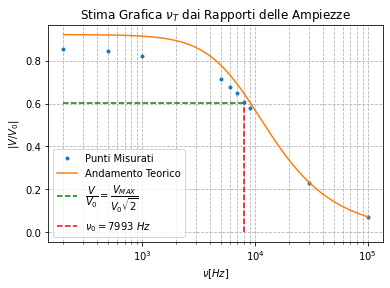

In [46]:
#3
xmin3 = np.min(omega3)
xmax3 = np.max(omega3)
x3 = np.linspace(xmin3,xmax3,1000)

y3 = (Rb/(Rb+Rl))/np.sqrt( 1 + np.power(2*pi*x3*Taul,2) )

plt.plot(omega3,V3/V03,ls='', marker='.',label='Punti Misurati')
plt.plot(x3,y3,label='Andamento Teorico')

H0 = V3[0]/(V03*sqrt(2))
om3 = 7993
plt.hlines(H0,xmin3,om3,ls='--',color='g',label='$\dfrac{V}{V_0} =\dfrac{V_{MAX}}{V_0\sqrt{2}}}$')
plt.vlines(om3,0,H0,ls='--',color='r',label='$\u03BD_{0}=7993\ Hz$')


plt.xscale("log")
plt.grid(which="both", ls="--",color='0.7')
plt.title('Stima Grafica $\u03BD_{T}$ dai Rapporti delle Ampiezze')
plt.ylabel("$|V/V_0|$")
plt.xlabel("$\u03BD[Hz]$")
plt.legend(loc="lower left")
V3[6]/V03

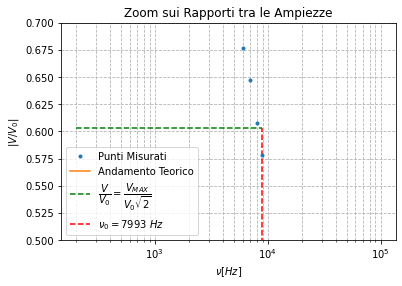

In [49]:
#3 zoommato
plt.plot(omega3,V3/V03,ls='', marker='.',label='Punti Misurati')
plt.plot(x3,y3,label='Andamento Teorico')
plt.hlines(H0,xmin3,om3,ls='--',color='g',label='$\dfrac{V}{V_0} =\dfrac{V_{MAX}}{V_0\sqrt{2}}}$')
plt.vlines(om3,0,H0,ls='--',color='r',label='$\u03BD_{0}=7993\ Hz$')
plt.xscale("log")
plt.grid(which="both", ls="--",color='0.7')
plt.title('Zoom sui Rapporti tra le Ampiezze')
plt.ylabel("$|V/V_0|$")
plt.xlabel("$\u03BD[Hz]$")
plt.ylim(0.5,0.7)
plt.legend(loc="lower left")


-0.7673528551952284

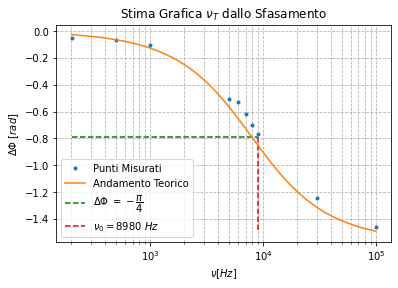

In [47]:
t3 = D3[2]*u
sf3 = -2*pi*t3*omega3
plt.plot(omega3,sf3,ls='', marker='.',label='Punti Misurati')

y3 = -np.arctan(2*pi*x3*Taul)
plt.plot(x3,y3,label='Andamento Teorico')


SF3 = -pi/4
om3 = 8980
plt.hlines(SF3,xmin3,om3,ls='--',color='g',label='$\Delta\Phi\ =-\dfrac{\pi}{4}$')
plt.vlines(om3,SF3,-1.5,ls='--',color='r',label='$\u03BD_{0}=8980\ Hz$')


plt.xscale("log")
plt.grid(which="both", ls="--",color='0.7')
plt.title('Stima Grafica $\u03BD_{T}$ dallo Sfasamento')
plt.ylabel("$\Delta\Phi\ [rad]$")
plt.xlabel("$\u03BD[Hz]$")
plt.legend(loc="lower left")
sf3[7]

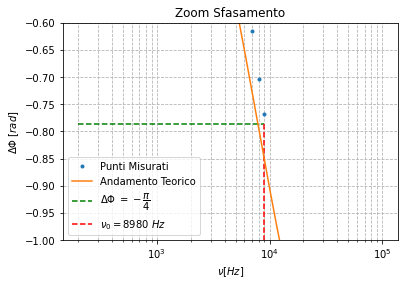

In [41]:
plt.plot(omega3,sf3,ls='', marker='.',label='Punti Misurati')
plt.plot(x3,y3,label='Andamento Teorico')
plt.hlines(SF3,xmin3,om3,ls='--',color='g',label='$\Delta\Phi\ =-\dfrac{\pi}{4}$')
plt.vlines(om3,SF3,-1.5,ls='--',color='r',label='$\u03BD_{0}=8980\ Hz$')
plt.xscale("log")
plt.grid(which="both", ls="--",color='0.7')
plt.title('Zoom Sfasamento')
plt.ylabel("$\Delta\Phi\ [rad]$")
plt.xlabel("$\u03BD[Hz]$")
plt.ylim(-1,-0.6)
plt.legend(loc="lower left")

In [40]:
t2 = D2[2]*u
sf2 = 2*pi*t2*omega2
print(V2[5]/V02)
print(sf2[5])

0.5735294117647058
0.9034215162075097
